In [1]:
# import libraries
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in files
student_df = pd.read_csv("Resources/Student Mental health.csv")
academic_performance_df = pd.read_csv("Resources/Effects on Academic Performance.csv")

In [3]:
# CLEANING DATA

In [4]:
# show column names
student_columns = student_df.columns
student_columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [5]:
student_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
# rename columns
student_df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year', 'GPA', 'Marital_status',
       'Depression', 'Anxiety',
       'Panic_attack',
       'Specialist_visit']

In [7]:
# delete timestamp column
del student_df['Timestamp']

In [8]:
student_df.head()

,Gender,Age,Course,Year,GPA,Marital_status,Depression,Anxiety,Panic_attack,Specialist_visit
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [9]:
# count how many total students
total_students = len(student_df["Gender"])
total_students

101

In [10]:
# make sure every column has same count
student_df.count()

Gender              101
Age                 100
Course              101
Year                101
GPA                 101
Marital_status      101
Depression          101
Anxiety             101
Panic_attack        101
Specialist_visit    101
dtype: int64

In [11]:
# see data types
student_df.dtypes

Gender               object
Age                 float64
Course               object
Year                 object
GPA                  object
Marital_status       object
Depression           object
Anxiety              object
Panic_attack         object
Specialist_visit     object
dtype: object

In [12]:
# count male vs female
student_df["Gender"].value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

In [13]:
# show different courses
#student_df["Course"].value_counts()

In [14]:
# Clean up Course column
student_df['Course'] = student_df['Course'].replace({'Koe': 'KOE','koe': 'KOE'})
student_df['Course'] = student_df['Course'].replace({'benl': 'BENL', 'Benl': 'BENL'})
student_df['Course'] = student_df['Course'].replace({'engin': 'Engineering','Engine': 'Engineering'})
student_df['Course'] = student_df['Course'].replace({'KIRKHS': 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'Islamic education': 'Islamic Education'})
student_df['Course'] = student_df['Course'].replace({'Laws': 'Law'})
student_df['Course'] = student_df['Course'].replace({'Pendidikan islam': 'Pendidikan Islam', 'Pendidikan Islam ': 'Pendidikan Islam'})
student_df['Course'] = student_df['Course'].replace({'Diploma Nursing': 'Nursing', 'Nursing ': 'Nursing'})
student_df['Course'] = student_df['Course'].replace({'Fiqh' : 'Fiqh Fatwa ', 'Fiqh Fatwa': 'Fiqh Fatwa'})
student_df['Course'] = student_df['Course'].replace({'Econs' : 'Econ'})
student_df['Course'] = student_df['Course'].replace({'Irkhs' : 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'ENM' : 'KENMS'})
student_df['Course'] = student_df['Course'].replace({'psychology' : 'Psychology'})

In [15]:
#student_df["Course"].value_counts()

In [16]:
# clean up Year column
student_df["Year"].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Year, dtype: int64

In [17]:
student_df['Year'] = student_df['Year'].replace({'year 1': 'Year 1'})
student_df['Year'] = student_df['Year'].replace({'year 2': 'Year 2'})
student_df['Year'] = student_df['Year'].replace({'year 3': 'Year 3'})

In [18]:
student_df["Year"].value_counts()

Year 1    43
Year 2    26
Year 3    24
year 4     8
Name: Year, dtype: int64

In [19]:
# clean up GPA column
student_df["GPA"].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: GPA, dtype: int64

In [20]:
#replace GPA to A and B level
student_df['GPA'] = student_df['GPA'].replace({'3.50 - 4.00 ':'A(higher)',
                                               '3.50 - 4.00': 'A(higher)',
                                              '3.00 - 3.49':'B(lower)',
                                              '2.50 - 2.99':'B(lower)',
                                              '2.00 - 2.49':'B(lower)',
                                              '0 - 1.99':'B(lower)'})

In [119]:
#showing dataframe after replacing GPA
student_df.head()

,Gender,Age,Course,Year,GPA,Marital_status,Depression,Anxiety,Panic_attack,Specialist_visit
0,Female,18.0,Engineering,Year 1,B(lower),No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,Year 2,B(lower),No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,B(lower),No,Yes,Yes,Yes,No
3,Female,22.0,Law,Year 3,B(lower),Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,B(lower),No,No,No,No,No


In [123]:
#loc for higher and lower GPA:
gpa_A_df = student_df.loc[student_df['GPA']=='A(higher)']
gpa_B_df = student_df.loc[student_df['GPA']=='B(lower)']

In [124]:
# length of series of parameters
len_ms = len(student_df['Marital_status'])
len_dp = len(student_df['Depression'])
len_an = len(student_df['Anxiety'])
len_pa = len(student_df['Panic_attack'])
len_sv = len(student_df['Specialist_visit'])

In [125]:
# percentage of students saing YES for A GPA
percent_ms_a = (len(gpa_A_df.loc[gpa_A_df['Marital_status'] =='Yes'])/len(student_df['Marital_status'])*100)
percent_dp_a = (len(gpa_A_df.loc[gpa_A_df['Depression'] =='Yes'])/len(student_df['Depression'])*100)
percent_an_a = (len(gpa_A_df.loc[gpa_A_df['Anxiety'] =='Yes'])/len(student_df['Anxiety'])*100)
percent_pa_a = (len(gpa_A_df.loc[gpa_A_df['Panic_attack'] =='Yes'])/len(student_df['Panic_attack'])*100)
percent_sv_a = (len(gpa_A_df.loc[gpa_A_df['Specialist_visit'] =='Yes'])/len(student_df['Specialist_visit'])*100)

In [126]:
# percentage of students saing YES for B GPA
percent_ms_b = (len(gpa_B_df.loc[gpa_B_df['Marital_status'] =='Yes'])/len(student_df['Marital_status'])*100)
percent_dp_b = (len(gpa_B_df.loc[gpa_B_df['Depression'] =='Yes'])/len(student_df['Depression'])*100)
percent_an_b = (len(gpa_B_df.loc[gpa_B_df['Anxiety'] =='Yes'])/len(student_df['Anxiety'])*100)
percent_pa_b = (len(gpa_B_df.loc[gpa_B_df['Panic_attack'] =='Yes'])/len(student_df['Panic_attack'])*100)
percent_sv_b = (len(gpa_B_df.loc[gpa_B_df['Specialist_visit'] =='Yes'])/len(student_df['Specialist_visit'])*100)

In [146]:
# #plot_data = pd.DataFrame({'Marital_status':[percent_ms_a],
#                           'Depression':[percent_dp_a],
#                           'Anxiety':[percent_an_a],
#                           'Panic_attack':[percent_pa_a],
#                          'Specialist_visit':[percent_sv_a]})

In [149]:
list_of_A = [percent_ms_a,percent_dp_a,percent_an_a,percent_pa_a,percent_sv_a]
list_of_B = [percent_ms_b,percent_dp_b,percent_an_b,percent_pa_b,percent_sv_b]
parametrs = ['parametrs','Depression','Anxiety','Panic_attack','Specialist_visit']

In [157]:
plot_data =pd.DataFrame({'parametrs':parametrs,
                         'A(higher)':list_of_A,
                         'B(lower)':list_of_B,
                        })


In [158]:
plot_data = plot_data.set_index('parametrs')
plot_data

,A(higher),B(lower)
parametrs,,
parametrs,6.930693,8.910891
Depression,12.871287,21.782178
Anxiety,17.821782,15.841584
Panic_attack,18.811881,13.861386
Specialist_visit,3.960396,1.980198


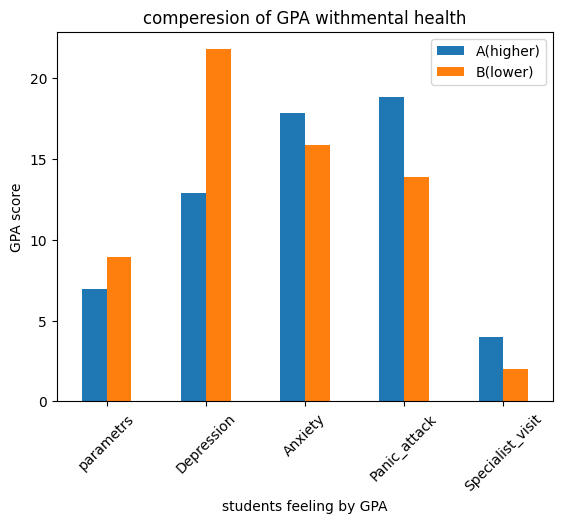

In [172]:
plot_data.plot.bar(xlabel = 'students feeling by GPA', ylabel = 'GPA score', title = 'comperesion of GPA withmental health' )
plt.xticks(rotation=45)

plt.show()

In [264]:
file_location = 'images/comperesion of GPA withmental health.png'
plt.savefig(file_location)


<Figure size 640x480 with 0 Axes>

In [173]:
##### OTHER SPREADSHEET 

In [174]:
academic_performance_df.head()

,Gender:,Age:,Educational Level,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or not have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed Or being so restless that you have been moving around a lot more than usual,Thoughts that you would be better off dead or of hurting yourself in some way,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,Your Last Semester GPA:
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
2,Female,18 years or less,High School,2,2,2,2,1,1,2,2,1,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97
3,Female,18 years or less,High School,3,1,2,3,3,1,1,1,2,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,2.74
4,Male,18 years or less,High School,1,2,2,3,1,1,3,1,1,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.37


In [176]:
# CLEANING DATA 

In [177]:
# rename columns
rename_academic_df = academic_performance_df.rename(columns = {'Gender:':'gender', 'Age:':'age',
                                     'Educational Level':'educational_level',
                                     'Little interest or pleasure in doing things ':'interest_level',
                                     'Feeling down, depressed, or hopeless':'depressed_level',
                                     'Trouble falling or staying asleep, or sleeping too much':'sleepy_level',
                                     'Feeling tired or having little energy':'energy_level',
                                     'Poor appetite or overeating':'appetite_level',
                                     'Feeling bad about yourself or that you are a failure or not have let yourself or your family down':'self_worth_level',
                                     'Trouble concentrating on things, such as reading the newspaper or watching television':'concentrating_level',
                                     'Moving or speaking so slowly that other people could have noticed Or being so restless that you have been moving around a lot more than usual':'restless_level',
                                     'Thoughts that you would be better off dead or of hurting yourself in some way':'suicidal_level',
                                     'Do you have part-time or full-time job? ':'employment',
                                     'Which of the following best describes your term-time accommodation?':'housing_situation',
                                     'How many hours do you spend studying each day?':'studing_spending',
                                     'How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?':'electronic_devices',
                                     'How many hours do you spend on social media per day?':'social_media_time',
                                     'Your Last Semester GPA: ':'GPA'})

In [178]:
# look at count to ensure each column has same number of rows 
rename_academic_df.count()

gender                 352
age                    352
educational_level      352
interest_level         352
depressed_level        352
sleepy_level           352
energy_level           352
appetite_level         352
self_worth_level       352
concentrating_level    352
restless_level         352
suicidal_level         352
employment             352
housing_situation      352
studing_spending       352
electronic_devices     352
social_media_time      352
GPA                    352
dtype: int64

In [179]:
# filter to show only "College - Bachelor's"
rename_academic_df['educational_level'].value_counts()

College - Bachelor's    204
High School             124
Master                   24
Name: educational_level, dtype: int64

In [180]:
bachelors_df = rename_academic_df.loc[rename_academic_df['educational_level'] == "College - Bachelor's"]
bachelors_df.head()

,gender,age,educational_level,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level,employment,housing_situation,studing_spending,electronic_devices,social_media_time,GPA
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
6,Female,19 to 24 years,College - Bachelor's,2,2,3,3,1,1,2,2,1,Part time,Home (with parents),1 - 2 hours,4 - 6,2 - 4 Hours,2.75
8,Female,19 to 24 years,College - Bachelor's,3,1,4,3,1,2,1,1,1,Full time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.97
10,Female,19 to 24 years,College - Bachelor's,2,4,4,3,2,3,4,1,3,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97


In [181]:
# reset index 
bachelors_df = bachelors_df.reset_index(drop = True)

In [182]:
bachelors_df.head()

,gender,age,educational_level,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level,employment,housing_situation,studing_spending,electronic_devices,social_media_time,GPA
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
2,Female,19 to 24 years,College - Bachelor's,2,2,3,3,1,1,2,2,1,Part time,Home (with parents),1 - 2 hours,4 - 6,2 - 4 Hours,2.75
3,Female,19 to 24 years,College - Bachelor's,3,1,4,3,1,2,1,1,1,Full time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.97
4,Female,19 to 24 years,College - Bachelor's,2,4,4,3,2,3,4,1,3,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97


In [183]:
gpa_bachelors_df = bachelors_df[['GPA','interest_level',
       'depressed_level', 'sleepy_level', 'energy_level', 'appetite_level',
       'self_worth_level', 'concentrating_level', 'restless_level',
       'suicidal_level']]
gpa_bachelors_df.head()

,GPA,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level
0,2.30,3,2,4,4,3,3,4,3,2
1,2.70,2,1,2,1,1,1,1,1,1
2,2.75,2,2,3,3,1,1,2,2,1
3,3.97,3,1,4,3,1,2,1,1,1
4,2.97,2,4,4,3,2,3,4,1,3


In [187]:
# createing bins
bins = [0,2.99,4.00]
labels = ['low_score','high_score']
gpa_bachelors_df['score_gpa'] = pd.cut(gpa_bachelors_df['GPA'],bins,labels=labels, include_lowest = True)


/Users/johnoliver/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [200]:
# reranging and showing new dataframe
gpa_bachelors_df = gpa_bachelors_df[['GPA','score_gpa','interest_level','depressed_level',
                                    'sleepy_level','energy_level','appetite_level',
                                    'self_worth_level','concentrating_level',
                                    'restless_level','suicidal_level']]
gpa_bachelors_df.head()

,GPA,score_gpa,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level
0,2.30,low_score,3,2,4,4,3,3,4,3,2
1,2.70,low_score,2,1,2,1,1,1,1,1,1
2,2.75,low_score,2,2,3,3,1,1,2,2,1
3,3.97,high_score,3,1,4,3,1,2,1,1,1
4,2.97,low_score,2,4,4,3,2,3,4,1,3


In [217]:
# taking mean of all feeling level of A and B GPA
interest_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['interest_level']
depressed_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['depressed_level']
sleepy_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['sleepy_level']
energy_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['energy_level']
appetite_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['appetite_level']
self_worth_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['self_worth_level']
concentrating_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['concentrating_level']
restless_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['restless_level']
suicidal_mean = gpa_bachelors_df.groupby(['score_gpa']).mean()['suicidal_level']


In [224]:
#creating new datafarme
ready_data = pd.DataFrame([interest_mean,depressed_mean,
                   sleepy_mean,energy_mean,appetite_mean,
                   self_worth_mean,concentrating_mean,restless_mean,suicidal_mean])
ready_data

score_gpa,low_score,high_score
interest_level,2.446809,2.372727
depressed_level,2.276596,2.236364
sleepy_level,2.946809,2.636364
energy_level,2.904255,2.772727
appetite_level,2.659574,2.500000
self_worth_level,2.606383,2.345455
concentrating_level,2.351064,2.036364
restless_level,1.755319,1.772727
suicidal_level,1.617021,1.536364


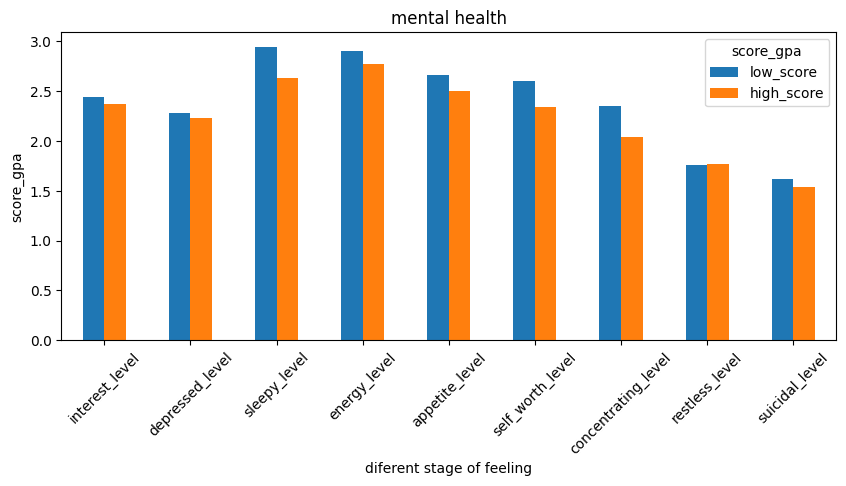

In [260]:
ready_data.plot(kind = 'bar',xlabel = 'diferent stage of feeling',ylabel = 'score_gpa',title ='mental health', figsize = (10,4))

plt.xticks(rotation=45)
plt.show()

In [261]:
file = 'images/GPA_and_menatal_health.png'

In [263]:
plt.savefig(file)
plt.show()

<Figure size 640x480 with 0 Axes>